# Unsupervised Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
breast_cancer = load_breast_cancer()

In [3]:
breast_data = breast_cancer.data
breast_target = breast_cancer.target

print(breast_data.shape)

(569, 30)


In [4]:
df_breast = pd.DataFrame(breast_data, columns=breast_cancer.feature_names)
df_breast["label"] = breast_cancer.target
df_breast.label.replace({0: "Benign", 1: "Malignant"}, inplace=True)

df_breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [5]:
# split to train and validation set
X_train, X_test, y_train, y_test = train_test_split(
    df_breast.drop(columns="label"),
    df_breast.label,
    test_size=.2,
    random_state=11
)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (455, 30)
Test size: (114, 30)


In [6]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_breast = scaler.transform(df_breast.drop(columns="label"))
df_scaled = pd.DataFrame(scaled_breast, columns=breast_cancer.feature_names)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.073178,-2.095651,1.244235,0.967996,1.502415,3.138429,2.561129,2.479214,2.210751,2.140086,...,1.877866,-1.380468,2.286322,2.018838,1.254466,2.573786,2.049471,2.255231,2.759907,1.917320
1,1.803583,-0.357829,1.658915,1.893594,-0.859756,-0.501403,-0.054002,0.514116,-0.017930,-0.856679,...,1.796667,-0.378798,1.516242,1.906334,-0.409706,-0.446652,-0.178578,1.048822,-0.251713,0.255726
2,1.554453,0.460523,1.539848,1.543290,0.884854,0.985191,1.301401,1.988770,0.925679,-0.405260,...,1.501020,-0.029532,1.328199,1.465244,0.483053,1.053478,0.810613,1.914884,1.152408,0.175650
3,-0.786805,0.255935,-0.612382,-0.783235,3.193690,3.253683,1.841109,1.408921,2.864301,4.686792,...,-0.302010,0.130274,-0.272551,-0.572876,3.317346,3.839343,1.931033,2.135198,6.074152,4.925760
4,1.724314,-1.164423,1.749241,1.811002,0.232204,0.489416,1.308761,1.385932,-0.028945,-0.562985,...,1.286572,-1.489202,1.319245,1.225948,0.179688,-0.330627,0.571843,0.691761,-0.879744,-0.424926


In [7]:
pca = PCA(n_components=2)
pc_breast = pca.fit_transform(df_scaled)

pc_breast[:5]

array([[ 9.13496028,  2.07477237],
       [ 2.51709168, -3.67615422],
       [ 5.74827648, -0.93851855],
       [ 6.7874647 , 10.39706658],
       [ 3.96557821, -1.93452624]])

In [8]:
df_pc_breast = pd.DataFrame(pc_breast, columns=["principal_comp_1", "principal_comp_2"])
df_pc_breast["label"] = df_breast.label
df_pc_breast.head(10)

,principal_comp_1,principal_comp_2,label
0,9.134960,2.074772,Benign
1,2.517092,-3.676154,Benign
2,5.748276,-0.938519,Benign
3,6.787465,10.397067,Benign
4,3.965578,-1.934526,Benign
5,2.237754,4.029845,Benign
6,2.312013,-2.571361,Benign
7,2.090217,2.367072,Benign
8,3.037975,3.521397,Benign
9,6.062865,7.906201,Benign


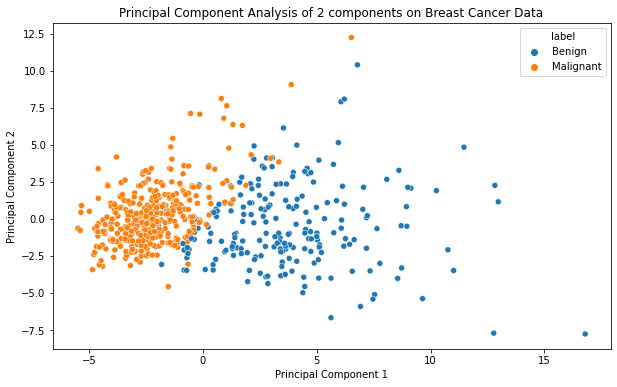

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="principal_comp_1", y="principal_comp_2", hue="label", data=df_pc_breast)
plt.title("Principal Component Analysis of 2 components on Breast Cancer Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [10]:
print("explained variance:", pca.explained_variance_ratio_)
print("sum of explained variance:", sum(pca.explained_variance_ratio_))

explained variance: [0.44500525 0.18785552]
sum of explained variance: 0.6328607700151995


In [11]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(1, num_components+1)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(
            r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]),
            va="bottom", ha="center", fontsize=12
        )
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

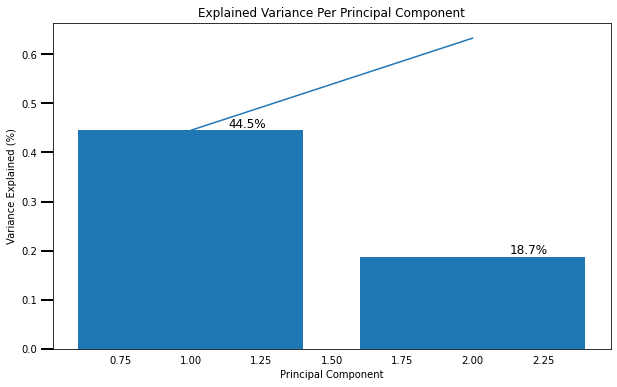

In [12]:
scree_plot(pca)

,principal component-1,principal component-2,principal component-3,principal component-4,principal component-5,principal component-6,principal component-7,principal component-8,principal component-9,principal component-10
0,9.134960,2.074772,-0.941275,-3.723094,-1.244863,1.312565,2.124913,-0.477813,-0.255626,-0.866546
1,2.517092,-3.676154,-0.618853,-1.125502,0.623292,0.071489,-0.040154,0.193303,-0.723077,1.132252
2,5.748276,-0.938519,-0.571117,-0.913801,-0.184948,0.537741,-0.666905,0.128134,0.094262,0.410451
3,6.787465,10.397067,-2.978751,-0.223958,-3.004848,2.855047,1.433694,1.042820,-1.501327,-1.102410
4,3.965578,-1.934526,1.342369,-2.922726,0.619152,-1.166239,-0.959042,0.630435,-0.244311,0.416210
...,...,...,...,...,...,...,...,...,...,...
564,6.557927,-3.537889,2.408793,-1.120967,0.043929,-2.326853,-0.585102,0.009017,1.010746,0.227862
565,3.913871,-3.532378,1.959512,2.563208,-0.454529,-0.231200,-0.787310,-1.061636,-0.090388,-0.129030
566,1.291763,-1.876080,0.450760,2.127454,1.817541,-0.452799,-0.167937,0.348498,0.456569,0.495235
567,10.252657,1.905621,-1.884000,2.333130,-0.026558,0.559854,0.188944,-0.329486,-0.506550,-0.068687


<Figure size 864x432 with 0 Axes>

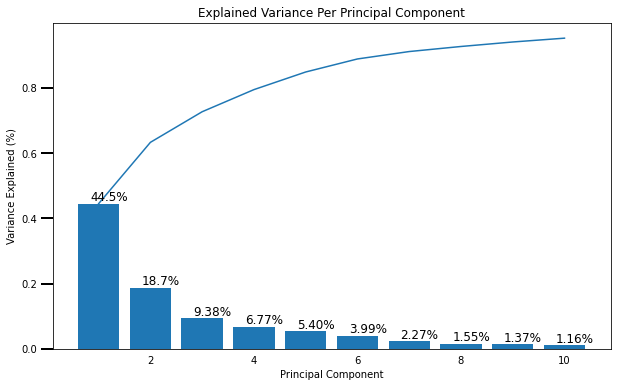

In [13]:
pca = PCA(n_components=10)
pca.fit(df_scaled)
df_pc_breast = pd.DataFrame(
    pca.transform(df_scaled),
    columns=[l+str(x) for l, x in zip(["principal component-"]*pca.n_components, range(1, pca.n_components+1))]
)
display(df_pc_breast)

plt.figure(figsize=(12, 6))
scree_plot(pca)

In [14]:
# model training on original scaled data
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled,
    df_breast.label,
    test_size=.2,
    random_state=11
)
print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

model = LogisticRegression()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print("Training performance:")
print(classification_report(y_train, train_predictions))
print()
print("Test performance:")
print(classification_report(y_test, test_predictions))

Training size: (455, 30)
Test size: (114, 30)
Training performance:
              precision    recall  f1-score   support

      Benign       0.99      0.97      0.98       174
   Malignant       0.98      1.00      0.99       281

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455


Test performance:
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        38
   Malignant       0.99      0.99      0.99        76

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [15]:
pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pc_breast = pd.DataFrame(
    pca.transform(df_scaled),
    columns=[l+str(x) for l, x in zip(["principal component-"]*pca.n_components, range(1, pca.n_components+1))]
)

X_train, X_test, y_train, y_test = train_test_split(
    df_pc_breast,
    df_breast.label,
    test_size=.2,
    random_state=11
)
print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

model = LogisticRegression()
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print("Training performance:")
print(classification_report(y_train, train_predictions))
print()
print("Test performance:")
print(classification_report(y_test, test_predictions))

Training size: (455, 2)
Test size: (114, 2)
Training performance:
              precision    recall  f1-score   support

      Benign       0.95      0.93      0.94       174
   Malignant       0.96      0.97      0.96       281

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455


Test performance:
              precision    recall  f1-score   support

      Benign       0.94      0.87      0.90        38
   Malignant       0.94      0.97      0.95        76

    accuracy                           0.94       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



/Users/syhamdani/.pyenv/versions/3.8.6/envs/PYTN/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


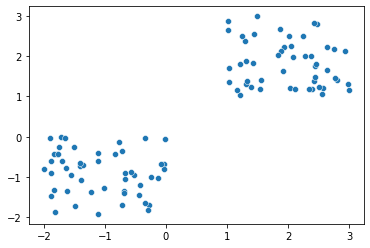

In [16]:
X = -2 * np.random.rand(100, 2)
X1 = 1 + 2*np.random.rand(50, 2)
X[50:100, :] = X1

sns.scatterplot(X[:, 0], X[:, 1])
plt.show()

In [17]:
kmeans = KMeans(3)
kmeans.fit(X)

KMeans(n_clusters=3)

/Users/syhamdani/.pyenv/versions/3.8.6/envs/PYTN/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


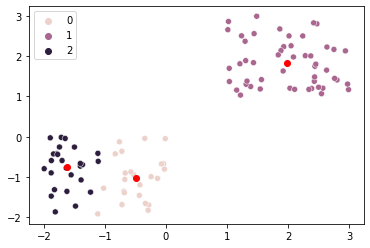

In [18]:
clusters = kmeans.predict(X)
sns.scatterplot(X[:, 0], X[:, 1], hue=clusters)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="r")

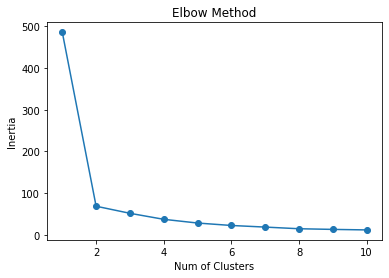

In [19]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.scatter(range(1, 11), inertia)
plt.title("Elbow Method")
plt.xlabel("Num of Clusters")
plt.ylabel("Inertia")
plt.show()

/Users/syhamdani/.pyenv/versions/3.8.6/envs/PYTN/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


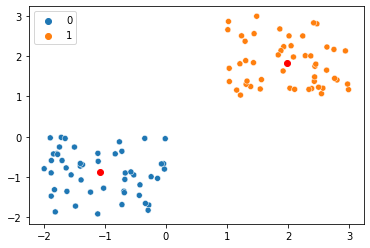

In [20]:
kmeans = KMeans(2)
kmeans.fit(X)

clusters = kmeans.predict(X)
sns.scatterplot(X[:, 0], X[:, 1], hue=clusters)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="r")
plt.show()

In [21]:
df = pd.read_csv("data/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)    # in numpy array -> DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


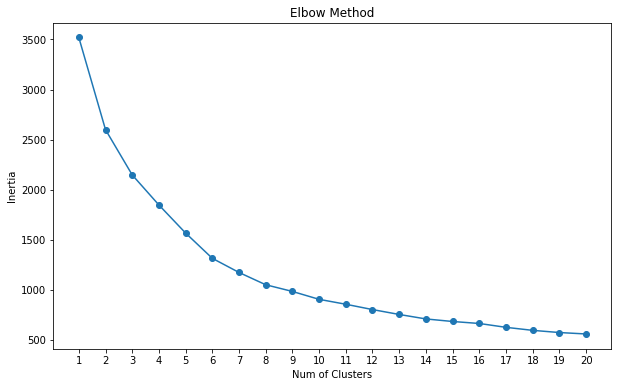

In [23]:
inertia = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), inertia)
plt.scatter(range(1, 21), inertia)
plt.title("Elbow Method")
plt.xticks(range(1, 21))
plt.xlabel("Num of Clusters")
plt.ylabel("Inertia")
plt.show()

In [24]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_scaled)
print("centroids:", kmeans.cluster_centers_)

clusters = kmeans.predict(df_scaled)
df["clusters"] = clusters
df.head(10)

centroids: [[-5.90811099e-01 -1.58939862e+00 -1.17369902e-01 -3.50992288e-01
  -4.02741180e-01  1.33513200e-02 -4.22747572e-01 -1.62015752e-01]
 [ 1.44865163e+00  1.63142372e-01 -3.47307951e-01  4.28317250e-01
   6.66702394e-01 -3.55967591e-01  6.92257331e-01  5.10760509e-03]
 [-5.50800431e-01  3.09580198e-01  1.86860622e+00 -1.26905907e-01
  -2.56963592e-01  1.42079094e+00 -4.18345174e-01  4.02778334e-01]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]
 [ 1.44865163e+00  2.93864819e-03  3.88728973e-01  3.94304862e+00
   4.02164626e+00  3.57841274e-02  4.22611641e+00  9.41635735e-01]
 [-6.90297086e-01  5.90668285e-01 -2.26969330e-01 -3.81612608e-01
  -4.75234627e-01 -1.72435121e-01 -4.42861386e-01 -1.86419955e-01]]


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,5
4,2,3,22615,5410,7198,3915,1777,5185,1
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,1
7,2,3,7579,4956,9426,1669,3321,2566,1
8,1,3,5963,3648,6192,425,1716,750,5
9,2,3,6006,11093,18881,1159,7425,2098,1


In [25]:
cluster_to_df = {}
for cluster in df.clusters.sort_values().unique():
    cluster_to_df[cluster] = df[df.clusters==cluster]

In [26]:
cluster_to_df.keys()

dict_keys([0, 1, 2, 3, 4, 5])

In [27]:
for cluster, df_cluster in cluster_to_df.items():
    print("Summary statistics of cluster-{}:".format(cluster))
    display(df_cluster.describe())

Summary statistics of cluster-0:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,1.046512,1.313953,10517.569767,3208.755814,4128.313953,3136.674419,868.186047,1068.488372,0.0
std,0.211825,0.466820,8003.506597,3710.931508,3335.332414,3067.466801,1240.678937,1025.708131,0.0
min,1.000000,1.000000,3.000000,258.000000,489.000000,91.000000,5.000000,7.000000,0.0
25%,1.000000,1.000000,4070.250000,1051.500000,1820.000000,957.000000,206.250000,384.000000,0.0
50%,1.000000,1.000000,8770.500000,1914.000000,2885.000000,2164.500000,389.500000,796.000000,0.0
75%,1.000000,2.000000,15654.000000,3735.000000,5315.250000,4308.000000,818.500000,1352.000000,0.0
max,2.000000,2.000000,31614.000000,23527.000000,16966.000000,15601.000000,5828.000000,6854.000000,0.0


Summary statistics of cluster-1:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
count,124.0,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.0
mean,2.0,2.669355,7612.774194,8953.814516,14279.854839,1345.790323,6178.322581,1539.258065,1.0
std,0.0,0.646715,7139.002059,4700.213052,6792.041659,1253.789678,3478.905265,1451.035604,0.0
min,2.0,1.000000,18.000000,1124.000000,4523.000000,33.000000,549.000000,3.000000,1.0
25%,2.0,3.000000,1923.000000,6146.000000,9532.500000,469.250000,3805.750000,522.500000,1.0
50%,2.0,3.000000,5350.000000,7741.500000,12188.000000,1012.000000,5386.500000,1250.500000,1.0
75%,2.0,3.000000,11662.250000,11105.750000,18953.750000,1746.250000,7712.250000,2104.500000,1.0
max,2.0,3.000000,31714.000000,25862.000000,36486.000000,8132.000000,17120.000000,7844.000000,1.0


Summary statistics of cluster-2:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,1.065217,2.782609,35606.304348,4860.717391,5512.086957,9961.565217,889.152174,2659.456522,2.0
std,0.249637,0.593035,19362.663648,5111.798317,4547.261998,10151.161253,993.767600,3022.297476,0.0
min,1.000000,1.000000,4983.000000,286.000000,471.000000,532.000000,20.000000,3.000000,2.0
25%,1.000000,3.000000,24285.250000,2177.000000,2500.000000,4486.750000,263.000000,1103.000000,2.0
50%,1.000000,3.000000,33585.500000,3832.500000,4613.000000,8656.000000,612.000000,1894.000000,2.0
75%,1.000000,3.000000,43012.500000,4997.250000,7067.500000,13201.000000,1103.250000,2834.000000,2.0
max,2.000000,3.000000,112151.000000,29627.000000,21042.000000,60869.000000,4948.000000,14472.000000,2.0


Summary statistics of cluster-3:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
25%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
50%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
75%,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0
max,1.0,3.0,36847.0,43950.0,20170.0,36534.0,239.0,47943.0,3.0


Summary statistics of cluster-4:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
count,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,2.0,2.545455,16911.090909,34864.363636,46126.181818,3245.454545,23008.090909,4177.363636,4.0
std,0.0,0.820200,14011.871342,18324.931401,21074.341730,2629.102941,9980.368014,4499.752733,0.0
min,2.0,1.000000,85.000000,4980.000000,22019.000000,36.000000,4337.000000,903.000000,4.0
25%,2.0,2.500000,7349.500000,25302.500000,32074.000000,1006.500000,18750.000000,1381.500000,4.0
50%,2.0,3.000000,12119.000000,29892.000000,39694.000000,3232.000000,20070.000000,2870.000000,4.0
75%,2.0,3.000000,24649.000000,42283.000000,57584.500000,4945.000000,25466.000000,5125.500000,4.0
max,2.0,3.000000,44466.000000,73498.000000,92780.000000,7782.000000,40827.000000,16523.000000,4.0


Summary statistics of cluster-5:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
count,172.0,172.0,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.0
mean,1.0,3.0,9133.005814,2983.023256,3440.180233,2235.767442,772.395349,999.744186,5.0
std,0.0,0.0,7321.473931,2988.033265,2939.576947,2233.887712,1115.070798,1005.315157,0.0
min,1.0,3.0,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,5.0
25%,1.0,3.0,3094.500000,1131.250000,1656.250000,596.750000,172.250000,341.500000,5.0
50%,1.0,3.0,7149.000000,2007.000000,2489.500000,1395.500000,352.500000,689.500000,5.0
75%,1.0,3.0,13558.750000,3708.000000,4248.000000,3152.500000,915.000000,1329.250000,5.0
max,1.0,3.0,31812.000000,21858.000000,16483.000000,9735.000000,6907.000000,5137.000000,5.0
